made by DevSeville

In [1]:
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import cv2

In [2]:
#directory for training and testing images
code_dir = os.path.abspath('.')
train_image_dir = code_dir+'/train-images'
test_image_dir = code_dir+'/test-images'

for i in tqdm(range(len(os.listdir(train_image_dir))), desc="locating train images"):
    time.sleep(0.1)
for b in tqdm(range(len(os.listdir(test_image_dir))), desc="locating test images"):
    time.sleep(0.1)

locating train images:   0%|          | 0/7 [00:00<?, ?it/s]

locating test images: 100%|██████████| 7/7 [00:00<00:00,  9.88it/s]


In [3]:
def load_images_from_directory(directory):
    image_files = [
        os.path.join(directory, file) for file in os.listdir(directory)
        if file.endswith((".jpg", ".jpeg", ".png", ".svg", ".jfif"))
    ]
    
    for filename in image_files:
        img = face_recognition.load_image_file(filename)
        img_encodings = face_recognition.face_encodings(img)
        if img_encodings:
            yield img_encodings[0], os.path.basename(filename), img

In [5]:

# loading training images and their encodings
train_embeddings = []
train_labels = []
train_images = []  # a new list to hold actual training images

for encoding, label, img in tqdm(load_images_from_directory(train_image_dir), desc="Loading training images"):
    # Check if img is in correct format
    if img.ndim == 3 and img.shape[2] in [3, 4]:  # 3 channels (RGB) or 4 channels (RGBA)
        # Convert BGR to RGB if required (face_recognition expects RGB)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_encodings = face_recognition.face_encodings(img_rgb)
        
        # If encodings are found, append them to the lists
        if img_encodings:
            train_embeddings.append(img_encodings[0])  # Get the first encoding
            train_labels.append(label)
            train_images.append(img)  # Putting corresponding image
    else:
        print(f"Image format not supported for {label}, skipping.")

# After loading images, you can print the counts
print(f"Loaded {len(train_images)} images with {len(train_embeddings)} embeddings.")

Loading training images: 7it [00:48,  6.89s/it]

Loaded 7 images with 7 embeddings.


In [9]:
import tqdm  # Make sure your tqdm is imported

# loading test images and their encodings
test_embeddings = []
test_images = []  # A new list to hold actual test images

# Wrap the loading process with tqdm to show progress
for encoding, label, img in tqdm.tqdm(load_images_from_directory(test_image_dir), desc="Loading test images"):
    test_embeddings.append(encoding)
    test_images.append(img)  # Putting the actual test image

print(f"Loaded {len(test_images)} test images with {len(test_embeddings)} embeddings.")

Loading test images: 7it [00:07,  1.10s/it]

Loaded 7 test images with 7 embeddings.


In [10]:
# rec faces in the test images
recognized_faces = []
matched_training_images = []  # A new list to store matched images

# Wrap the face recognition process
for test_embedding in tqdm.tqdm(test_embeddings, desc="Recognizing faces in test images"):
    distances = face_recognition.face_distance(train_embeddings, test_embedding)

    if distances.size > 0:
        best_match_index = np.argmin(distances)
        recognized_faces.append(train_labels[best_match_index])
        matched_training_images.append(train_images[best_match_index])  # Storing the corresponding training image
    else:
        recognized_faces.append("Unknown")
        matched_training_images.append(None)  # If no match found

print(f"Recognized {len(recognized_faces)} faces.")


Recognizing faces in test images: 100%|██████████| 7/7 [00:00<?, ?it/s]

Recognized 7 faces.


Recognized faces:
Test image 0: Recognized face - ryan gosling.jpg


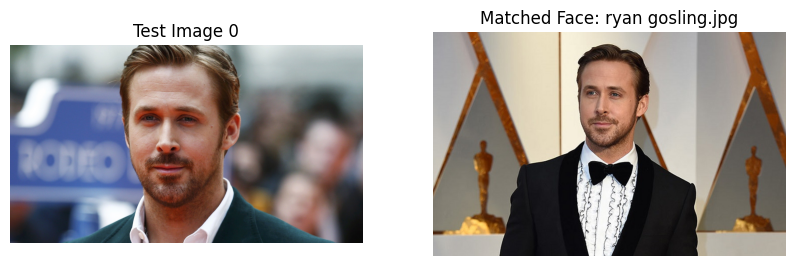

Test image 1: Recognized face - alan.jpg


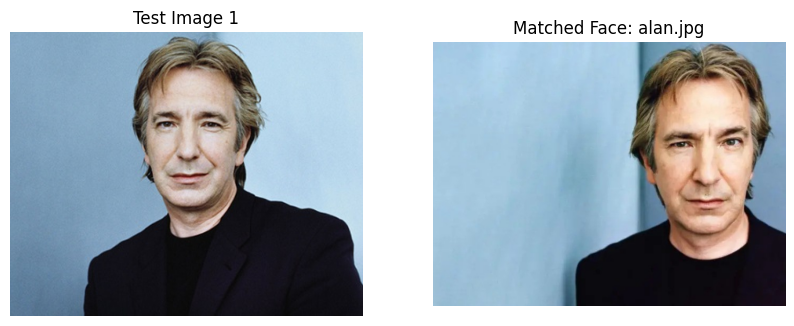

Test image 2: Recognized face - brad2.jpg


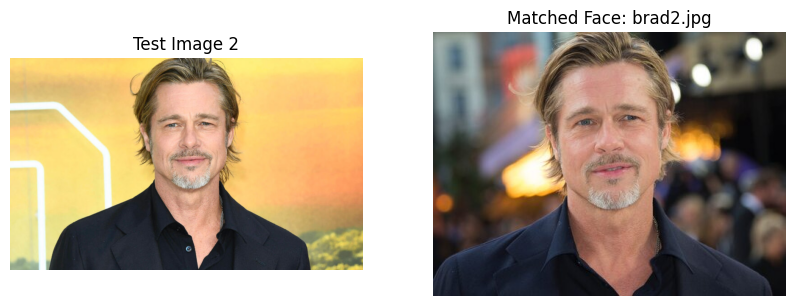

Test image 3: Recognized face - bale.jpg


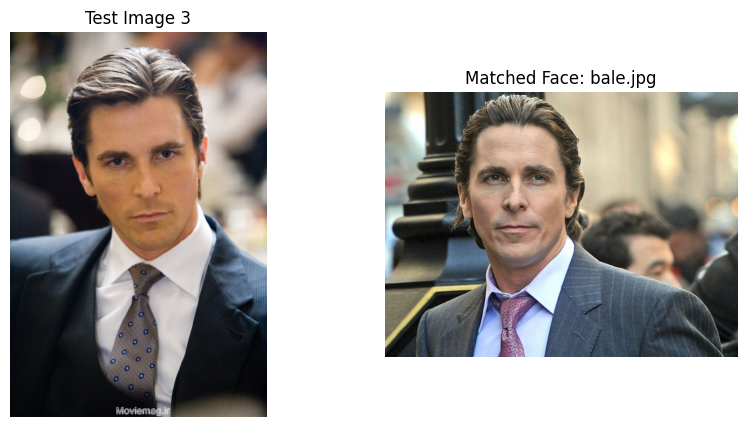

Test image 4: Recognized face - DanielRadcliffe.jpg


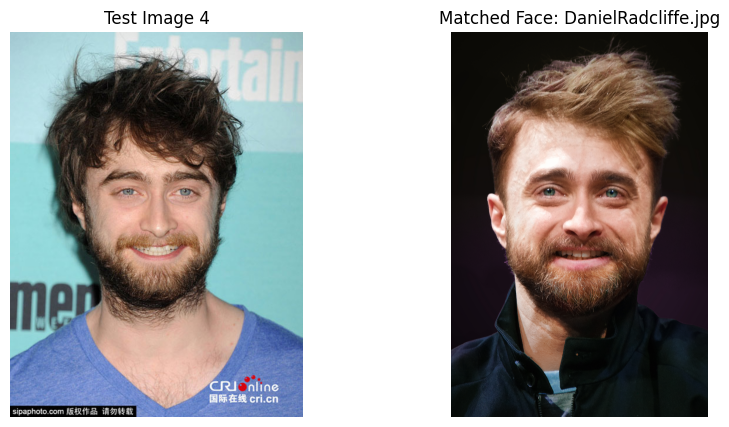

Test image 5: Recognized face - decaprio.jpg


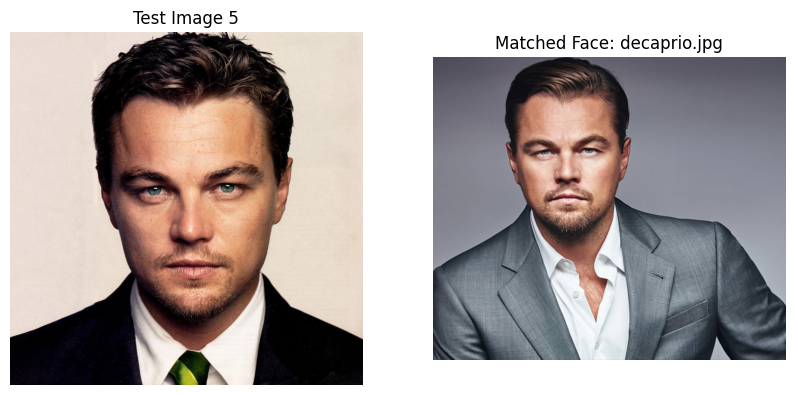

Test image 6: Recognized face - depp.jpeg


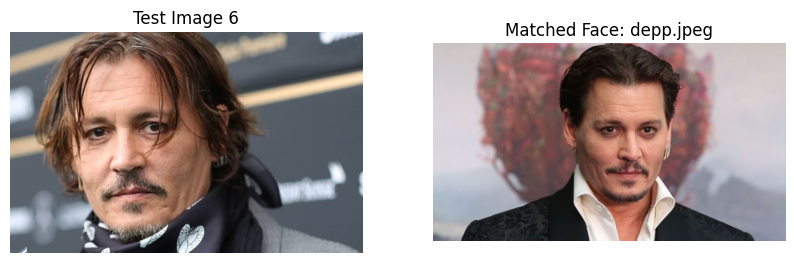

In [8]:
# output recognized faces and display images
print("Recognized faces:")
for i, face in enumerate(recognized_faces):
    print(f"Test image {i}: Recognized face - {face}")

    # display the test image
    plt.figure(figsize=(10, 5))
    
    # show the test image
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[i])  #test image for display
    plt.title(f"Test Image {i}")
    plt.axis('off')  # turn off axis

    # show the matched image if found
    plt.subplot(1, 2, 2)
    if matched_training_images[i] is not None:
        plt.imshow(matched_training_images[i])  # matched training image for display
        plt.title(f"Matched Face: {face}")
    else:
        plt.title("No Match Found")
    
    plt.axis('off')  # turnin off axis
    plt.show()

keep in mind that this code will find the most similair face even if the target face isn't included in train files